<a href="https://colab.research.google.com/github/rishabhuniyal12/LR_Delivery_Time_Prediction_-Rishabh-Uniyal-/blob/main/LR_Delivery_Time_Prediction_rishabh_uniyal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving porter_data_1.csv to porter_data_1.csv


In [ ]:
import pandas as pd

try:
    df = pd.read_csv('porter_data_1.csv')
    display(df.head())
    display(df.tail())
except FileNotFoundError:
    print("Error: The file 'porter_data_1.csv' was not found.")
    df = None # Set df to None to indicate failure
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None # Set df to None to indicate failure

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

market_id           created_at actual_delivery_time  \
175772        1.0  2015-02-17 00:19:41  2015-02-17 01:02:41   
175773        1.0  2015-02-13 00:01:59  2015-02-13 01:03:59   
175774        1.0  2015-01-24 04:46:08  2015-01-24 05:32:08   
175775        1.0  2015-02-01 18:18:15  2015-02-01 19:03:15   
175776        1.0  2015-02-08 19:24:33  2015-02-08 20:01:33   

        store_primary_category  order_protocol  total_items  subtotal  \
175772                      28             4.0            3      1389   
175773                      28             4.0            6      3010   
175774                      28             4.0            5      1836   
175775                      58             1.0            1      1175   
175776                      58             1.0            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
175772                   3             345             649   
175773                   4             405             825   
175774                   3             300             399   
175775                   1             535             535   
175776                   4             425             750   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
175772                   17.0                17.0                      23.0   
175773                   12.0                11.0                      14.0   
175774                   39.0                41.0                      40.0   
175775                    7.0                 7.0                      12.0   
175776                   20.0                20.0                      23.0   

        distance  
175772     13.24  
175773     36.60  
175774     31.80  
175775     15.36  
175776      5.36

In [ ]:
print("Data Shape:", df.shape)
df.info()


Data Shape: (175777, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance           

In [ ]:
print("\nTarget Variable: actual_delivery_time (Reasoning: The task focuses on delivery times.)")


Target Variable: actual_delivery_time (Reasoning: The task focuses on delivery times.)


In [ ]:
print("\nMissing Value Analysis:")
missing_percentages = df.isnull().sum() * 100 / len(df)
print(missing_percentages)


Missing Value Analysis:
market_id                   0.0
created_at                  0.0
actual_delivery_time        0.0
store_primary_category      0.0
order_protocol              0.0
total_items                 0.0
subtotal                    0.0
num_distinct_items          0.0
min_item_price              0.0
max_item_price              0.0
total_onshift_dashers       0.0
total_busy_dashers          0.0
total_outstanding_orders    0.0
distance                    0.0
dtype: float64


In [ ]:
print("\nData Type Exploration:")
print(df.dtypes)


Data Type Exploration:
market_id                   float64
created_at                   object
actual_delivery_time         object
store_primary_category        int64
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_dashers       float64
total_busy_dashers          float64
total_outstanding_orders    float64
distance                    float64
dtype: object


In [ ]:
print("\nUnique Value Counts (Categorical Features):")
for col in df.select_dtypes(include=['object', 'category']):
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    if df[col].nunique() <= 10:
        print(df[col].value_counts())


Unique Value Counts (Categorical Features):

Column: created_at
Number of unique values: 162649

Column: actual_delivery_time
Number of unique values: 160344


In [ ]:
try:
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
except Exception as e:
    print(f"An error occurred during datetime conversion: {e}")

In [ ]:
print("\nObservations:")
print("1. 'created_at' and 'actual_delivery_time' columns have been converted to datetime objects.")


Observations:
1. 'created_at' and 'actual_delivery_time' columns have been converted to datetime objects.


In [ ]:
print("\nNumerical Feature Distributions:")
for col in df.select_dtypes(include=['number']):
    print(f"\nColumn: {col}")
    print(f"Unique values: {df[col].nunique()}")
    if df[col].nunique() < 10 :
      print(df[col].value_counts())


Numerical Feature Distributions:

Column: market_id
Unique values: 6
market_id
2.0    53469
4.0    46222
1.0    37115
3.0    21075
5.0    17258
6.0      638
Name: count, dtype: int64

Column: store_primary_category
Unique values: 73

Column: order_protocol
Unique values: 7
order_protocol
1.0    48404
3.0    47125
5.0    41415
2.0    20890
4.0    17246
6.0      678
7.0       19
Name: count, dtype: int64

Column: total_items
Unique values: 54

Column: subtotal
Unique values: 8182

Column: num_distinct_items
Unique values: 20

Column: min_item_price
Unique values: 2251

Column: max_item_price
Unique values: 2585

Column: total_onshift_dashers
Unique values: 172

Column: total_busy_dashers
Unique values: 158

Column: total_outstanding_orders
Unique values: 281

Column: distance
Unique values: 1318


In [ ]:
print("\nCategorical Feature Distributions:")
for col in df.select_dtypes(include=['object', 'category']):
    print(f"\nColumn: {col}")
    print(f"Unique values: {df[col].nunique()}")
    if df[col].nunique() < 10 :
      print(df[col].value_counts())


Categorical Feature Distributions:


In [ ]:

print("Missing Value Analysis:")
missing_percentages = df.isnull().sum() * 100 / len(df)
print(missing_percentages)

for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Imputed missing values in '{col}' with the median.")
        elif pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"Imputed missing values in '{col}' with the mode.")
    else:
        print(f"No missing values in column '{col}'")

Missing Value Analysis:
market_id                   0.0
created_at                  0.0
actual_delivery_time        0.0
store_primary_category      0.0
order_protocol              0.0
total_items                 0.0
subtotal                    0.0
num_distinct_items          0.0
min_item_price              0.0
max_item_price              0.0
total_onshift_dashers       0.0
total_busy_dashers          0.0
total_outstanding_orders    0.0
distance                    0.0
dtype: float64
No missing values in column 'market_id'
No missing values in column 'created_at'
No missing values in column 'actual_delivery_time'
No missing values in column 'store_primary_category'
No missing values in column 'order_protocol'
No missing values in column 'total_items'
No missing values in column 'subtotal'
No missing values in column 'num_distinct_items'
No missing values in column 'min_item_price'
No missing values in column 'max_item_price'
No missing values in column 'total_onshift_dashers'
No missing 

In [ ]:
for col in ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
            'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'market_id', 'order_protocol', 'store_primary_category']:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        if df[col].isnull().any():
            print(f"Found non-numeric values in column '{col}', imputing with median.")
            df[col].fillna(df[col].median(), inplace=True)
    except Exception as e:
        print(f"An error occurred while converting '{col}' to numeric: {e}")




In [ ]:
for col in ['created_at', 'actual_delivery_time']:
    try:
        df[col] = pd.to_datetime(df[col], errors='raise')
    except ValueError as e:
        print(f"Error converting '{col}': {e}")

    except Exception as e:
        print(f"An unexpected error occurred during datetime conversion for {col}: {e}")


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split


df_train, df_val = train_test_split(
    df, train_size=0.8, random_state=42
)

print("df_train shape:", df_train.shape)
print("df_val shape:", df_val.shape)

df_train shape: (140621, 14)
df_val shape: (35156, 14)


In [ ]:

for col in ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
            'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')


for col in ['market_id', 'order_protocol', 'store_primary_category']:
    df_train[col] = df_train[col].astype('category')

for col in ['created_at', 'actual_delivery_time']:
    df_train[col] = pd.to_datetime(df_train[col], errors='coerce')


df_train['created_at_hour'] = df_train['created_at'].dt.hour
df_train['created_at_dayofweek'] = df_train['created_at'].dt.dayofweek
df_train['actual_delivery_time_hour'] = df_train['actual_delivery_time'].dt.hour
df_train['actual_delivery_time_dayofweek'] = df_train['actual_delivery_time'].dt.dayofweek


df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   market_id                       140621 non-null  category      
 1   created_at                      140621 non-null  datetime64[ns]
 2   actual_delivery_time            140621 non-null  datetime64[ns]
 3   store_primary_category          140621 non-null  category      
 4   order_protocol                  140621 non-null  category      
 5   total_items                     140621 non-null  int64         
 6   subtotal                        140621 non-null  int64         
 7   num_distinct_items              140621 non-null  int64         
 8   min_item_price                  140621 non-null  int64         
 9   max_item_price                  140621 non-null  int64         
 10  total_onshift_dashers           140621 non-null  float64

Data Exploration

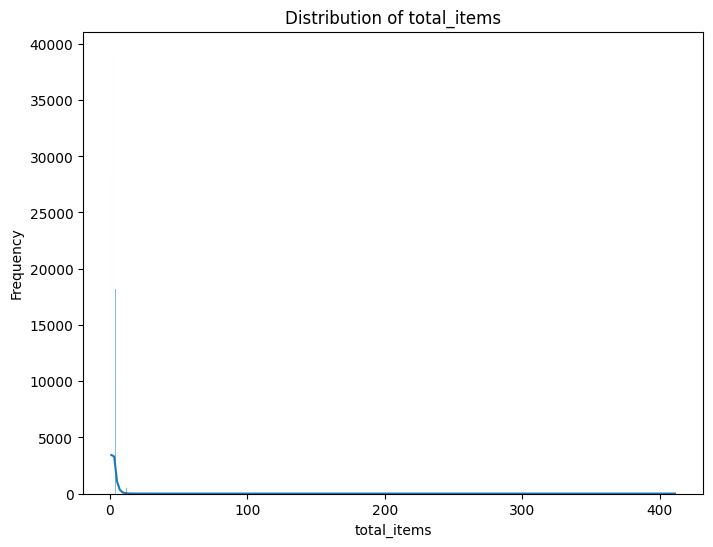

count    140621.000000
mean          3.208582
std           2.727133
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         411.000000
Name: total_items, dtype: float64


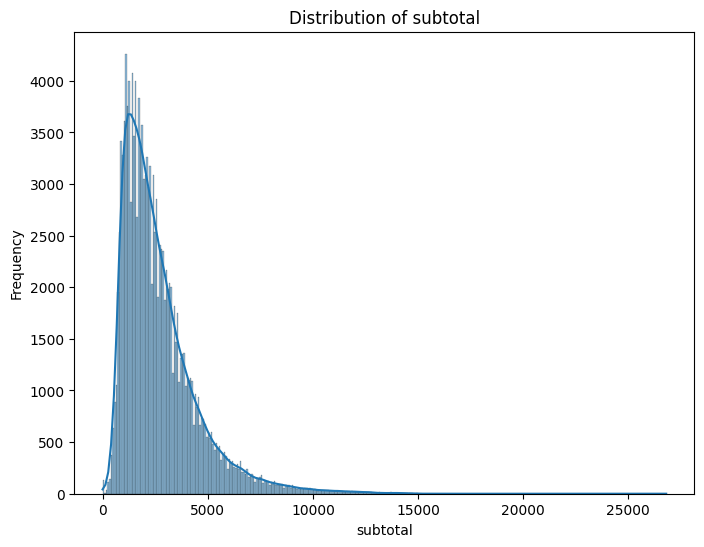

count    140621.000000
mean       2698.872530
std        1830.808391
min           0.000000
25%        1418.000000
50%        2225.000000
75%        3415.000000
max       26800.000000
Name: subtotal, dtype: float64


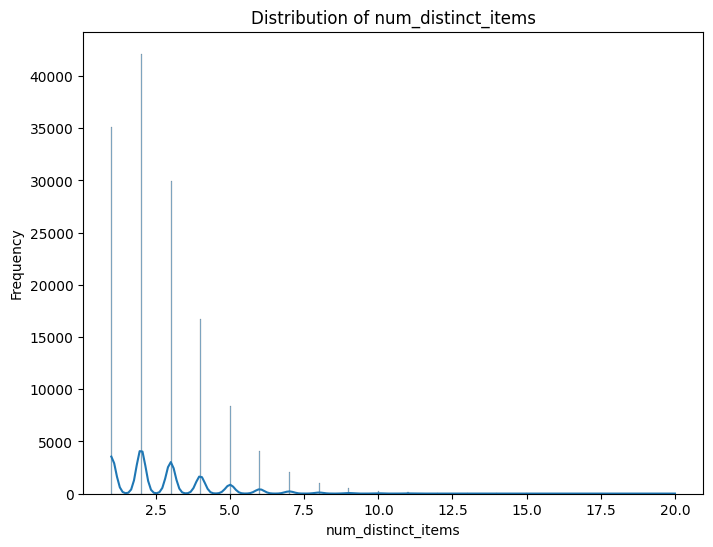

count    140621.000000
mean          2.676464
std           1.626023
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: num_distinct_items, dtype: float64


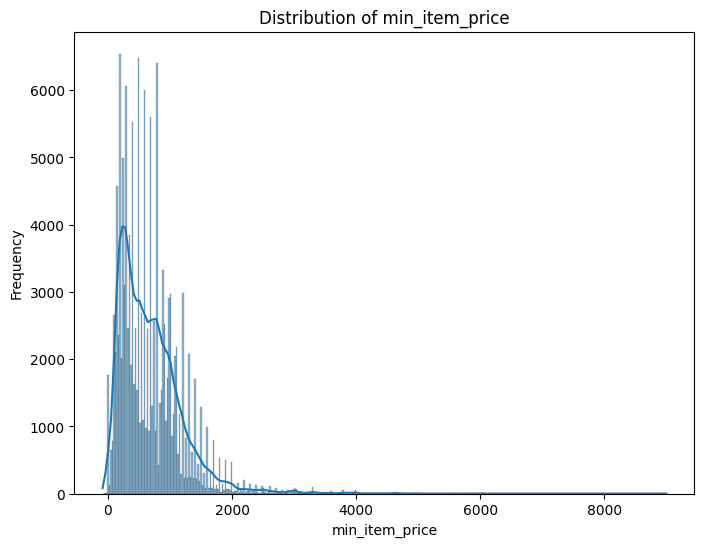

count    140621.000000
mean        684.377589
std         518.633806
min         -86.000000
25%         299.000000
50%         595.000000
75%         940.000000
max        8999.000000
Name: min_item_price, dtype: float64


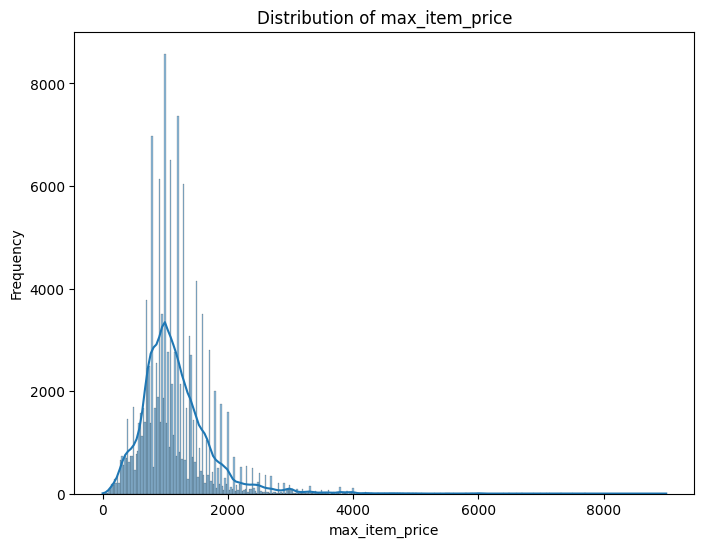

count    140621.000000
mean       1159.948656
std         559.693980
min           0.000000
25%         799.000000
50%        1095.000000
75%        1395.000000
max        8999.000000
Name: max_item_price, dtype: float64


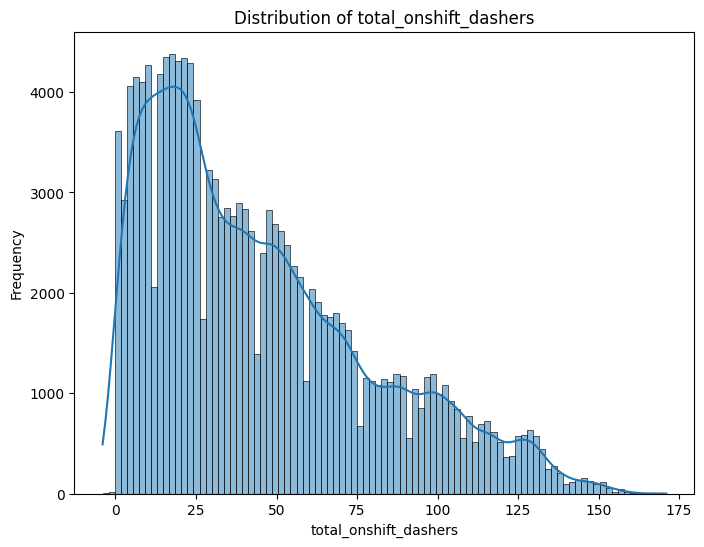

count    140621.000000
mean         44.927948
std          34.572455
min          -4.000000
25%          17.000000
50%          37.000000
75%          66.000000
max         171.000000
Name: total_onshift_dashers, dtype: float64


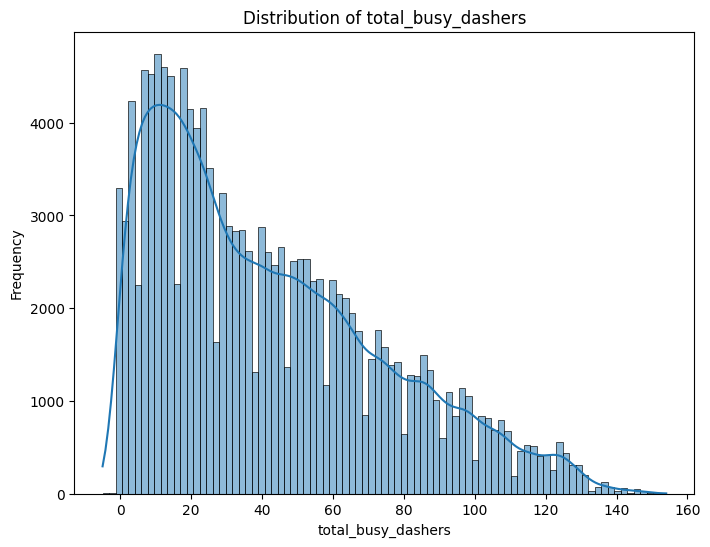

count    140621.000000
mean         41.880025
std          32.197755
min          -5.000000
25%          15.000000
50%          35.000000
75%          63.000000
max         154.000000
Name: total_busy_dashers, dtype: float64


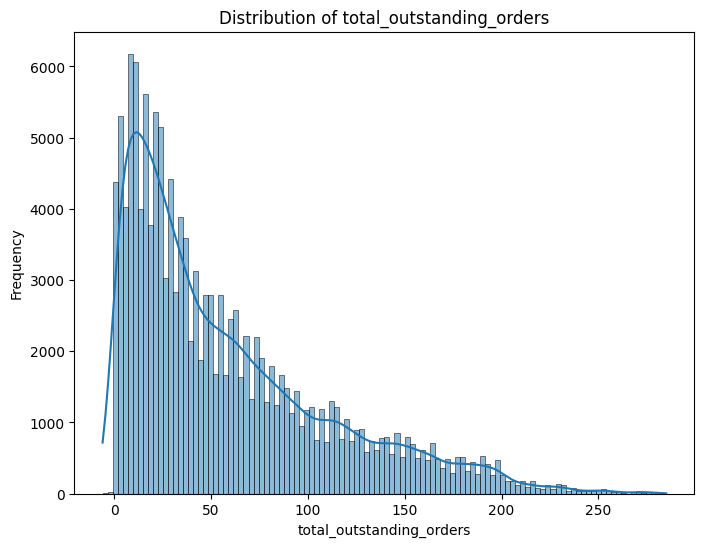

count    140621.000000
mean         58.245148
std          52.773640
min          -6.000000
25%          17.000000
50%          41.000000
75%          85.000000
max         285.000000
Name: total_outstanding_orders, dtype: float64


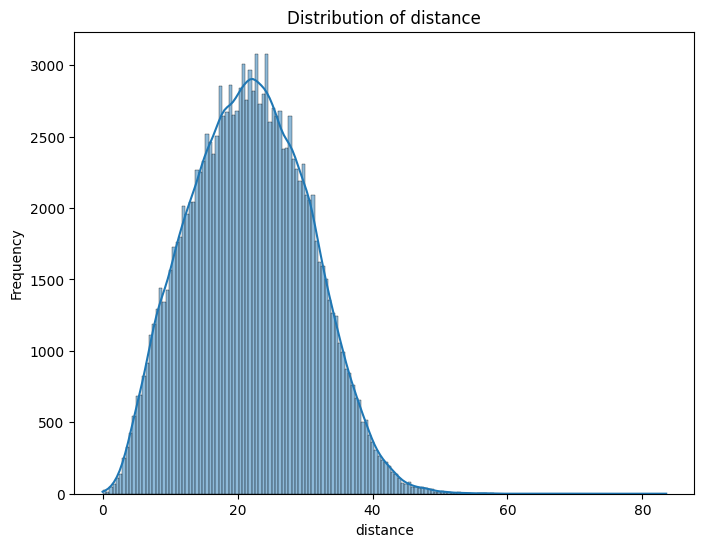

count    140621.000000
mean         21.841054
std           8.751147
min           0.000000
25%          15.320000
50%          21.760000
75%          28.120000
max          83.520000
Name: distance, dtype: float64


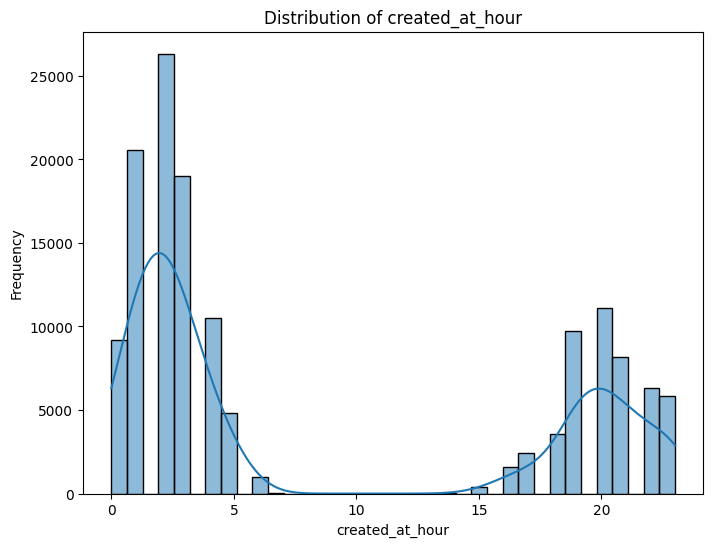

count    140621.000000
mean          8.475932
std           8.677293
min           0.000000
25%           2.000000
50%           3.000000
75%          19.000000
max          23.000000
Name: created_at_hour, dtype: float64


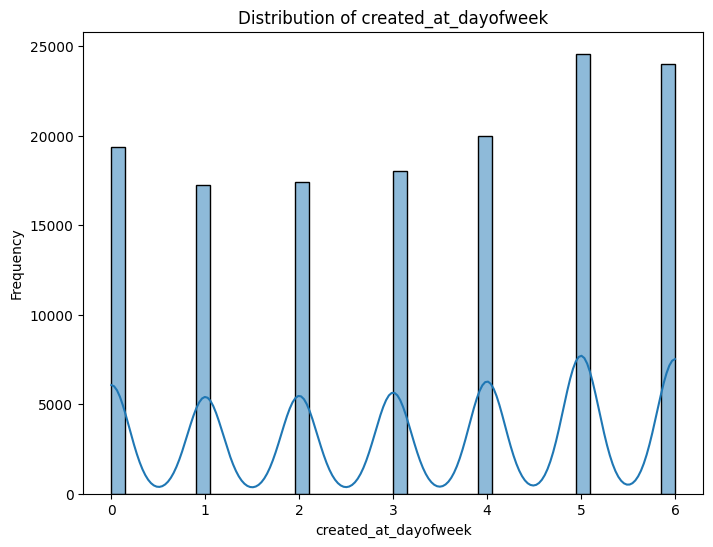

count    140621.000000
mean          3.221468
std           2.044919
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: created_at_dayofweek, dtype: float64


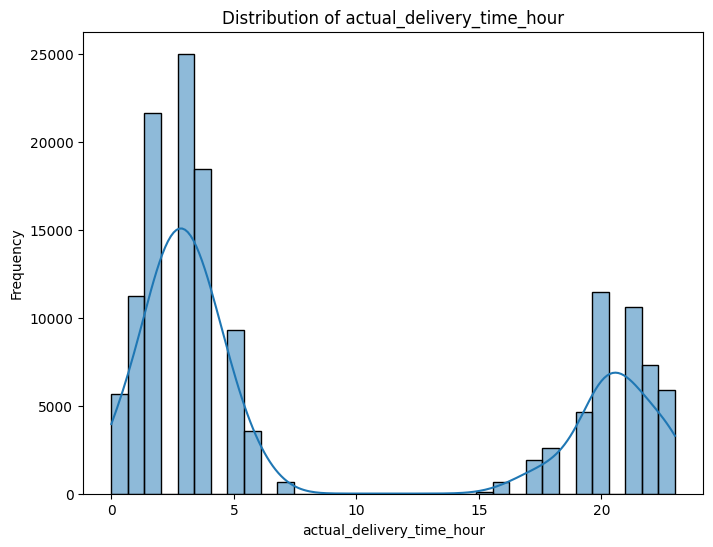

count    140621.000000
mean          8.550224
std           8.383521
min           0.000000
25%           2.000000
50%           4.000000
75%          20.000000
max          23.000000
Name: actual_delivery_time_hour, dtype: float64


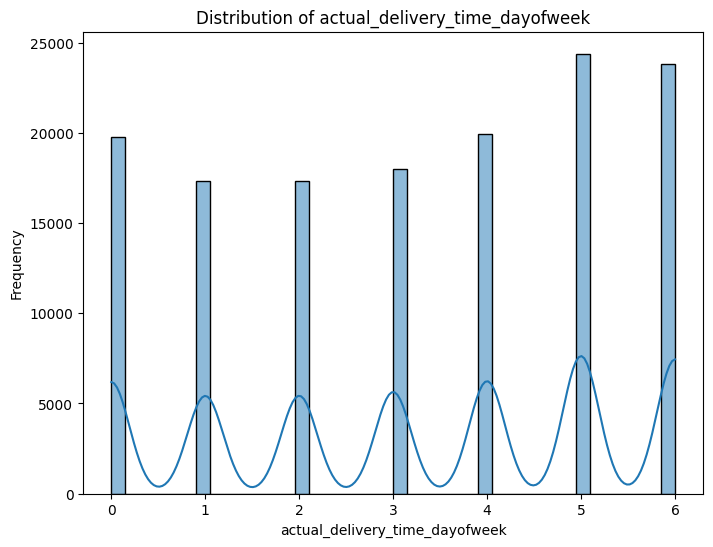

count    140621.000000
mean          3.204514
std           2.049327
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: actual_delivery_time_dayofweek, dtype: float64


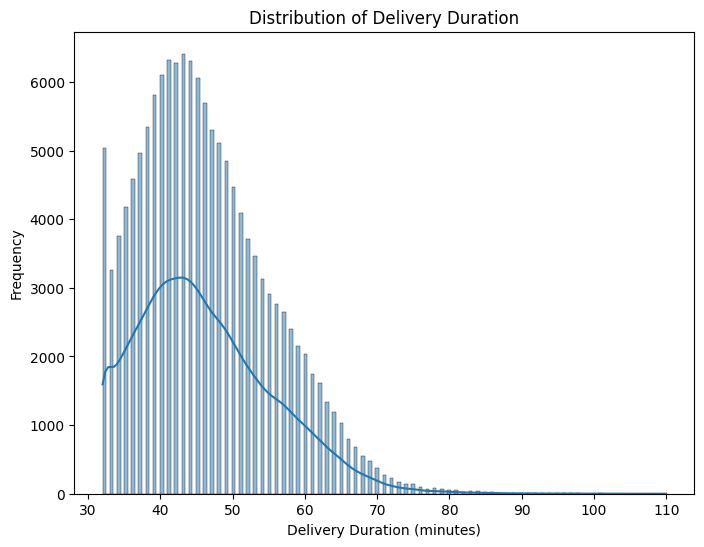

count    140621.000000
mean         46.198071
std           9.320360
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: delivery_duration, dtype: float64


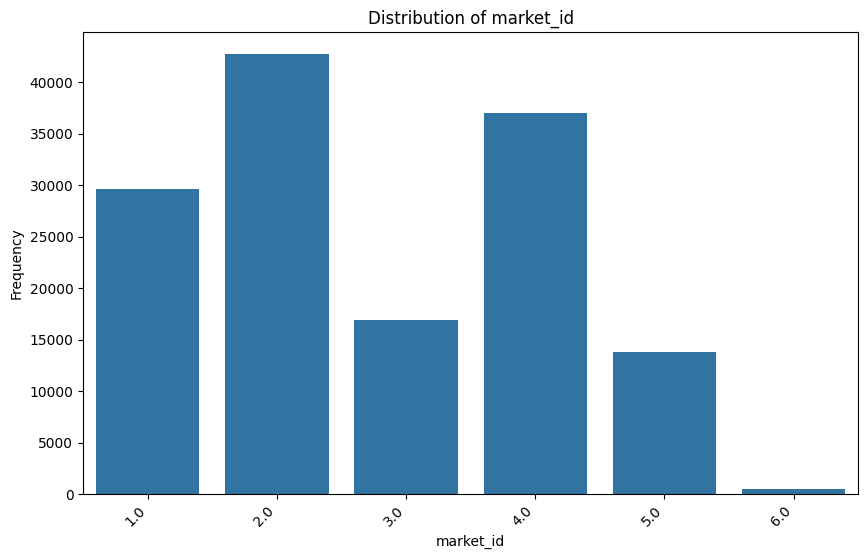

market_id
2.0    42722
4.0    36961
1.0    29662
3.0    16934
5.0    13838
6.0      504
Name: count, dtype: int64


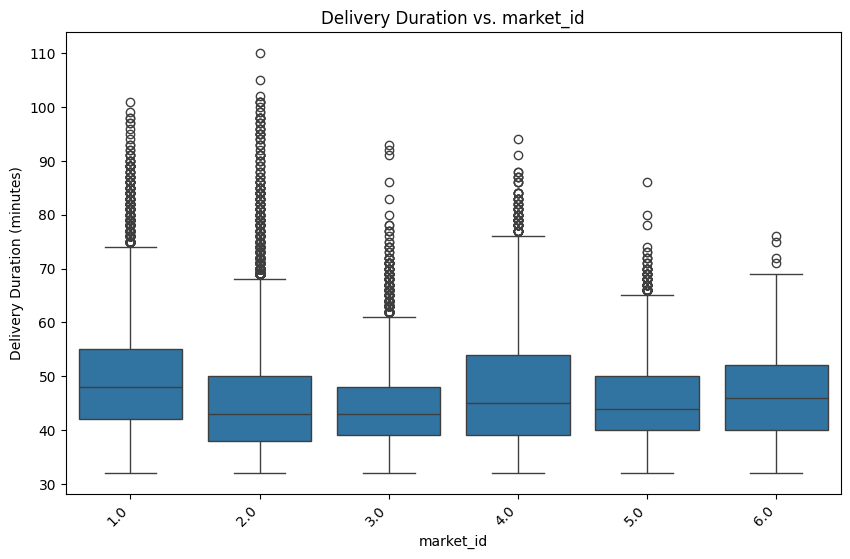

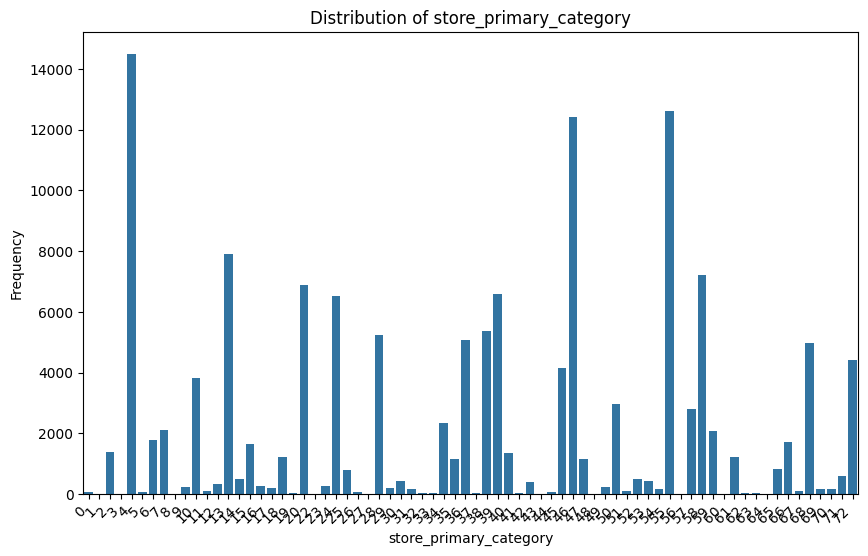

store_primary_category
4     14483
55    12603
46    12427
13     7907
58     7227
      ...  
56        9
1         7
43        6
3         1
8         1
Name: count, Length: 72, dtype: int64


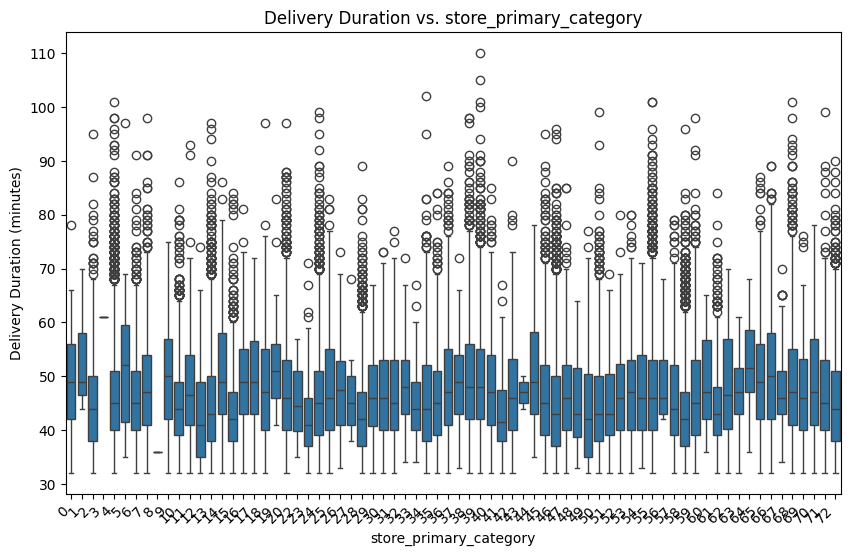

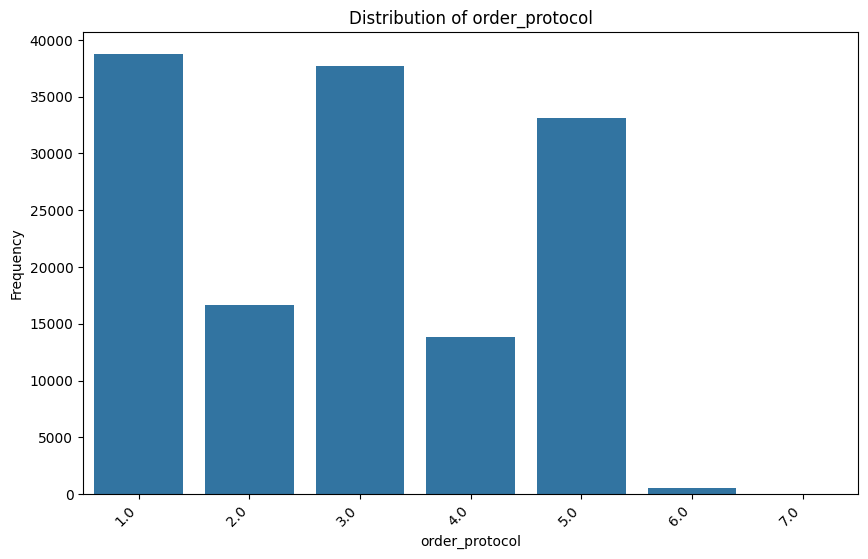

order_protocol
1.0    38746
3.0    37674
5.0    33118
2.0    16689
4.0    13842
6.0      534
7.0       18
Name: count, dtype: int64


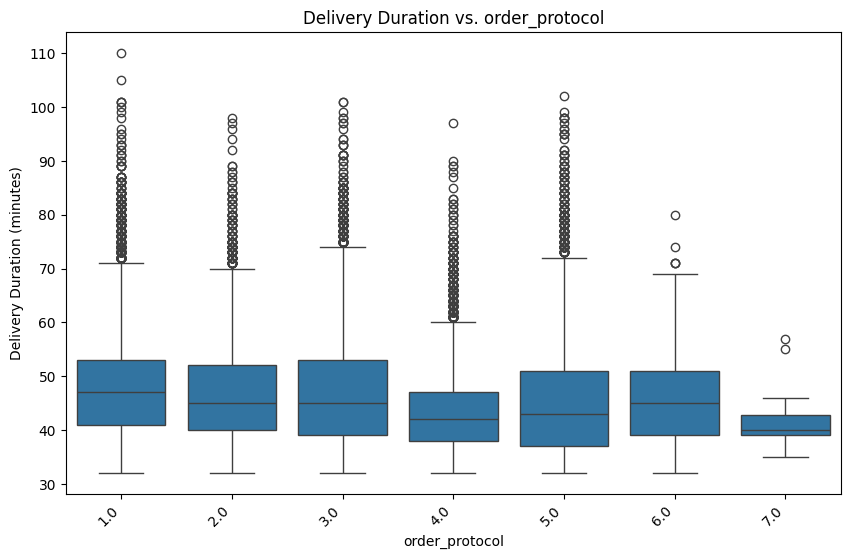

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
                      'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance',
                      'created_at_hour', 'created_at_dayofweek', 'actual_delivery_time_hour',
                      'actual_delivery_time_dayofweek']
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    print(df_train[col].describe())

df_train['delivery_duration'] = (df_train['actual_delivery_time'] - df_train['created_at']).dt.total_seconds() / 60
plt.figure(figsize=(8, 6))
sns.histplot(df_train['delivery_duration'], kde=True)
plt.title('Distribution of Delivery Duration')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.show()
print(df_train['delivery_duration'].describe())


categorical_features = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df_train)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    print(df_train[col].value_counts())


    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='delivery_duration', data=df_train)
    plt.title(f'Delivery Duration vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Duration (minutes)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

Analysing the data

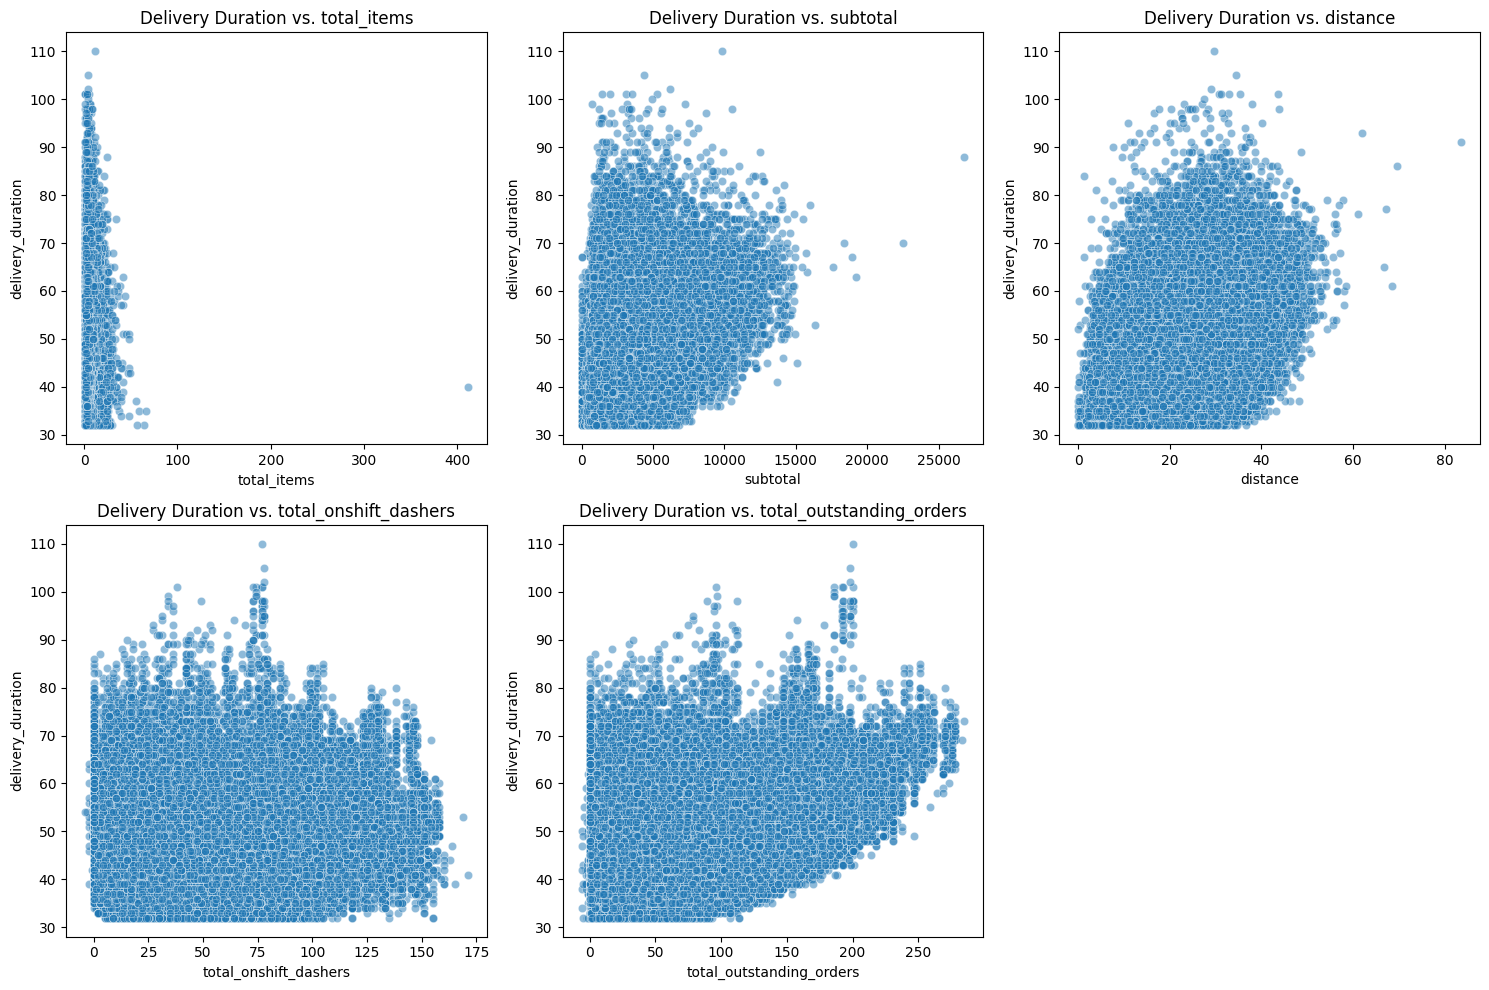

Correlation Coefficients:
 total_items                 0.220804
subtotal                    0.413392
distance                    0.461026
total_onshift_dashers       0.171828
total_outstanding_orders    0.385028
delivery_duration           1.000000
Name: delivery_duration, dtype: float64


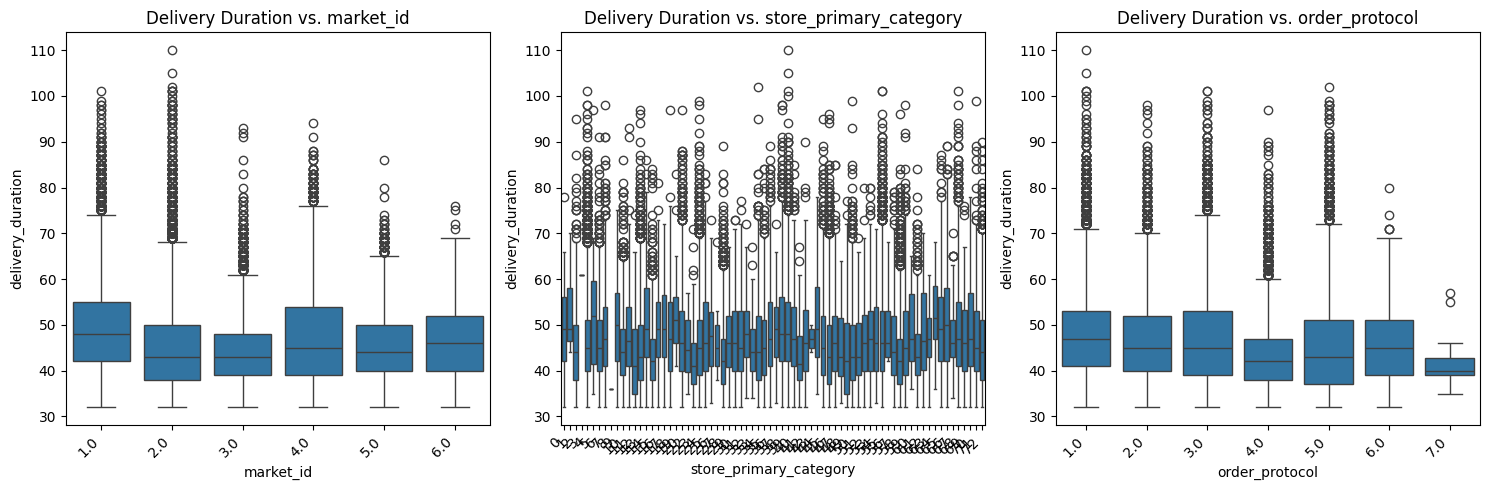

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_features = ['total_items', 'subtotal', 'distance', 'total_onshift_dashers', 'total_outstanding_orders']


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=col, y='delivery_duration', data=df_train, alpha=0.5)
    plt.title(f'Delivery Duration vs. {col}')
plt.tight_layout()
plt.show()

correlation_coefficients = df_train[numerical_features + ['delivery_duration']].corr()['delivery_duration']
print("Correlation Coefficients:\n", correlation_coefficients)


categorical_features = ['market_id', 'store_primary_category', 'order_protocol']


plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=col, y='delivery_duration', data=df_train)
    plt.title(f'Delivery Duration vs. {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

creating heatmap

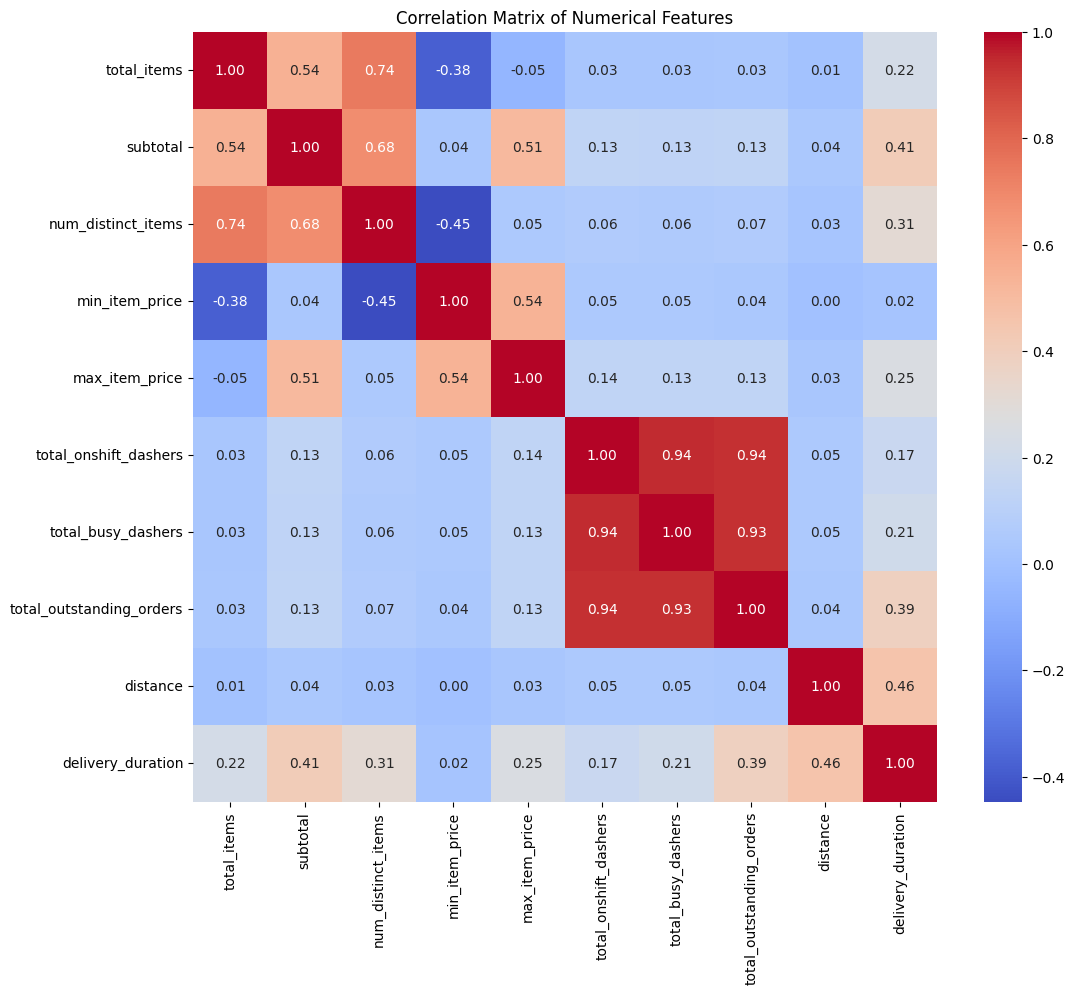

Weakly correlated features: ['min_item_price']


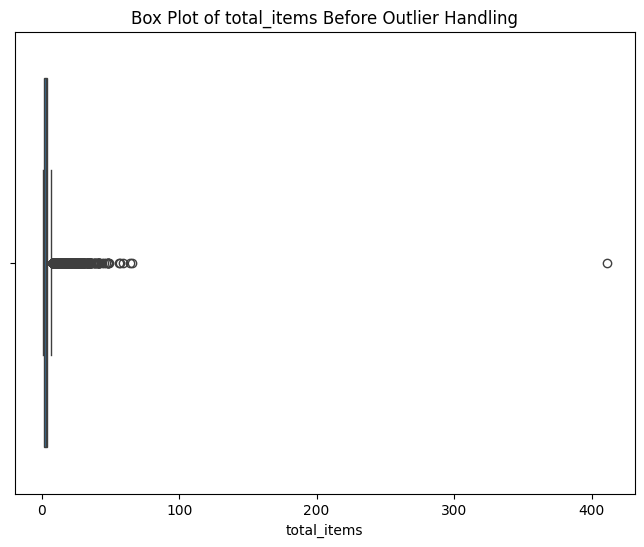

Summary statistics for total_items before outlier handling:
count    140621.000000
mean          3.208582
std           2.727133
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         411.000000
Name: total_items, dtype: float64


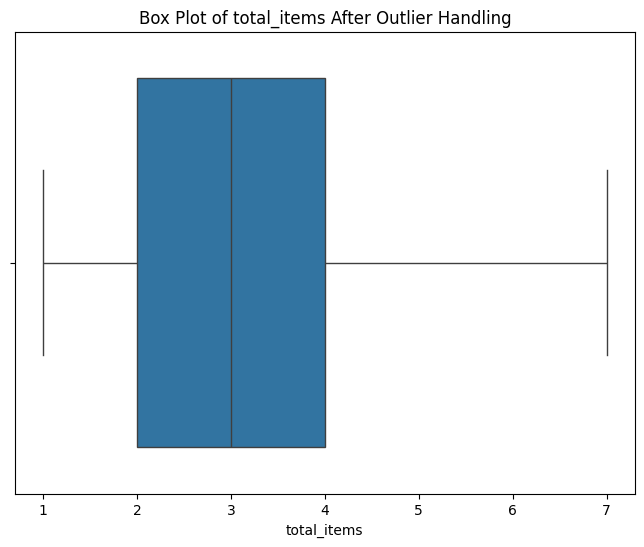

Summary statistics for total_items after outlier handling:
count    140621.000000
mean          3.017366
std           1.755649
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           7.000000
Name: total_items, dtype: float64


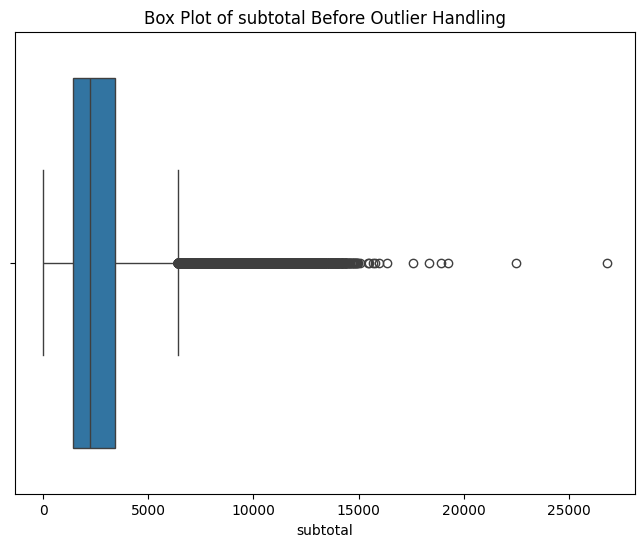

Summary statistics for subtotal before outlier handling:
count    140621.000000
mean       2698.872530
std        1830.808391
min           0.000000
25%        1418.000000
50%        2225.000000
75%        3415.000000
max       26800.000000
Name: subtotal, dtype: float64


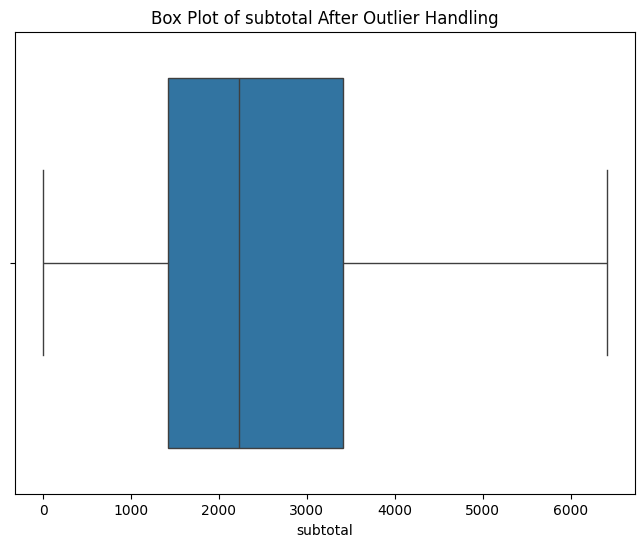

Summary statistics for subtotal after outlier handling:
count    140621.000000
mean       2609.259862
std        1533.396741
min           0.000000
25%        1418.000000
50%        2225.000000
75%        3415.000000
max        6410.500000
Name: subtotal, dtype: float64


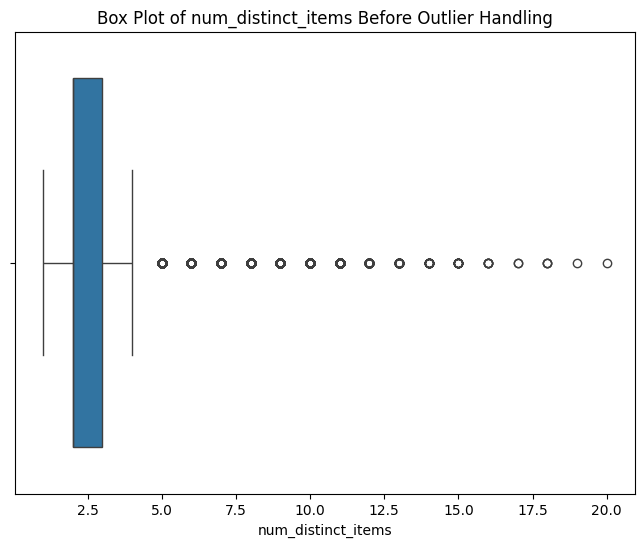

Summary statistics for num_distinct_items before outlier handling:
count    140621.000000
mean          2.676464
std           1.626023
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: num_distinct_items, dtype: float64


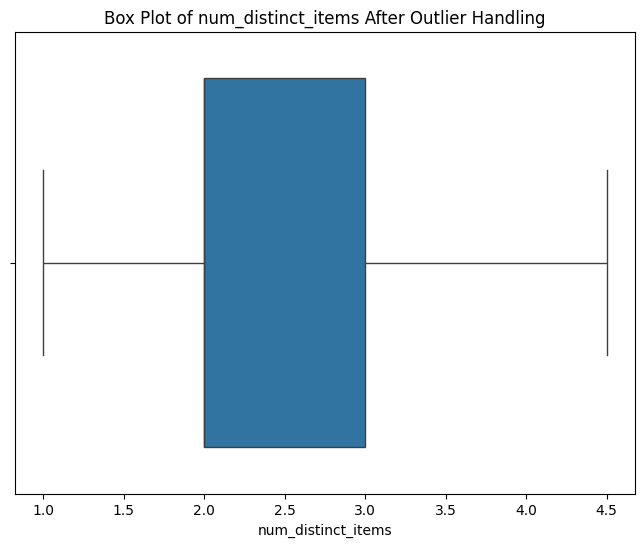

Summary statistics for num_distinct_items after outlier handling:
count    140621.000000
mean          2.496931
std           1.196676
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.500000
Name: num_distinct_items, dtype: float64


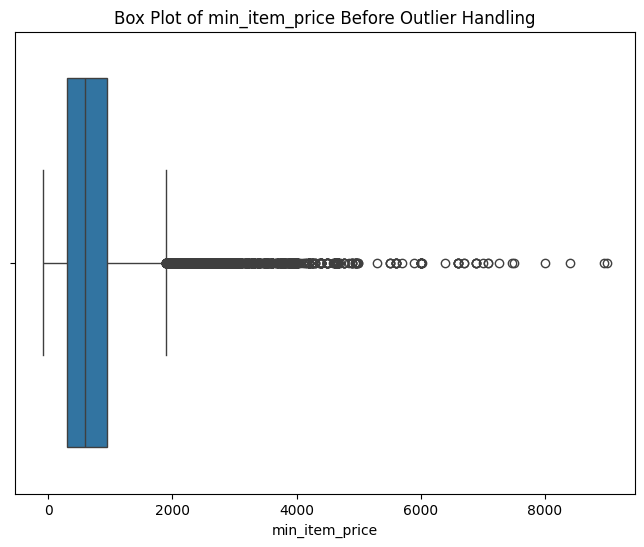

Summary statistics for min_item_price before outlier handling:
count    140621.000000
mean        684.377589
std         518.633806
min         -86.000000
25%         299.000000
50%         595.000000
75%         940.000000
max        8999.000000
Name: min_item_price, dtype: float64


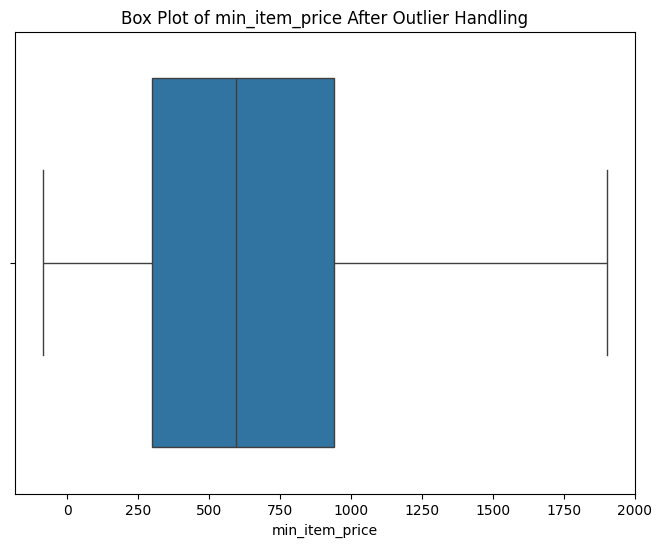

Summary statistics for min_item_price after outlier handling:
count    140621.000000
mean        667.037093
std         445.775526
min         -86.000000
25%         299.000000
50%         595.000000
75%         940.000000
max        1901.500000
Name: min_item_price, dtype: float64


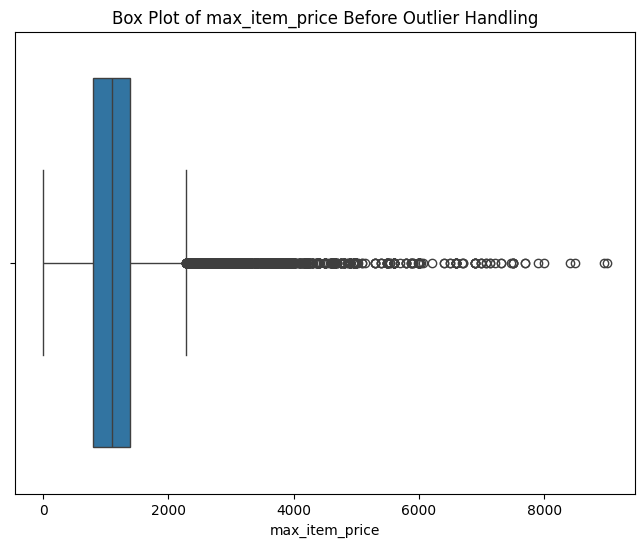

Summary statistics for max_item_price before outlier handling:
count    140621.000000
mean       1159.948656
std         559.693980
min           0.000000
25%         799.000000
50%        1095.000000
75%        1395.000000
max        8999.000000
Name: max_item_price, dtype: float64


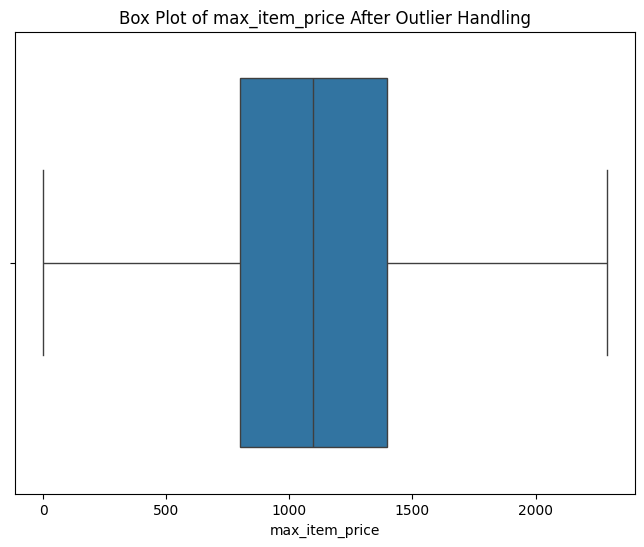

Summary statistics for max_item_price after outlier handling:
count    140621.000000
mean       1134.479857
std         464.497796
min           0.000000
25%         799.000000
50%        1095.000000
75%        1395.000000
max        2289.000000
Name: max_item_price, dtype: float64


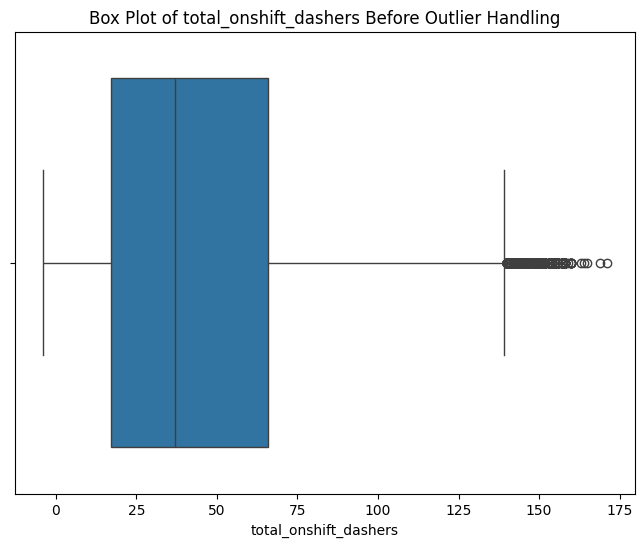

Summary statistics for total_onshift_dashers before outlier handling:
count    140621.000000
mean         44.927948
std          34.572455
min          -4.000000
25%          17.000000
50%          37.000000
75%          66.000000
max         171.000000
Name: total_onshift_dashers, dtype: float64


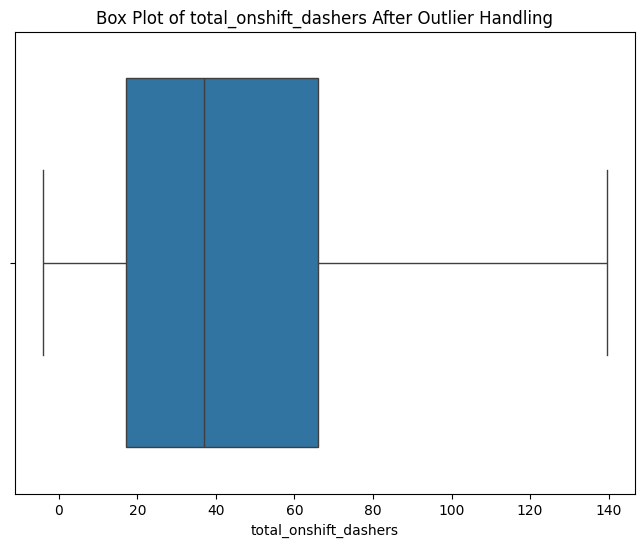

Summary statistics for total_onshift_dashers after outlier handling:
count    140621.000000
mean         44.876306
std          34.422605
min          -4.000000
25%          17.000000
50%          37.000000
75%          66.000000
max         139.500000
Name: total_onshift_dashers, dtype: float64


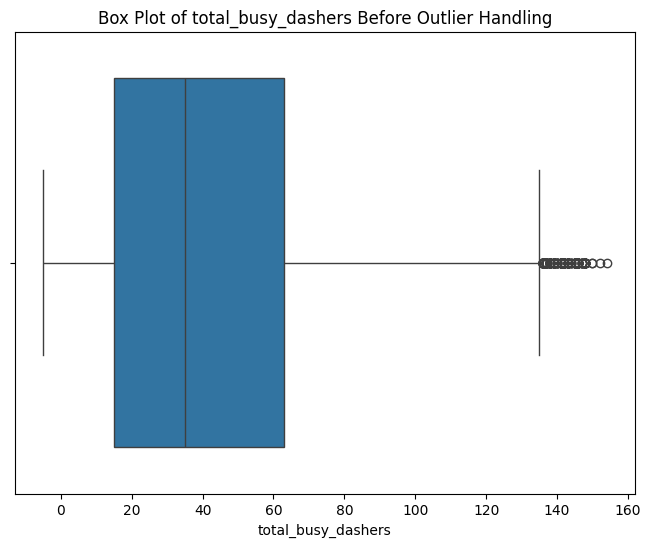

Summary statistics for total_busy_dashers before outlier handling:
count    140621.000000
mean         41.880025
std          32.197755
min          -5.000000
25%          15.000000
50%          35.000000
75%          63.000000
max         154.000000
Name: total_busy_dashers, dtype: float64


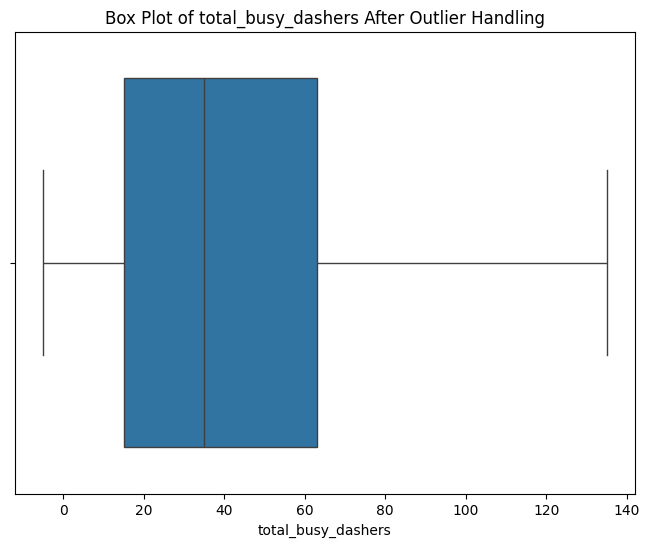

Summary statistics for total_busy_dashers after outlier handling:
count    140621.000000
mean         41.865753
std          32.154551
min          -5.000000
25%          15.000000
50%          35.000000
75%          63.000000
max         135.000000
Name: total_busy_dashers, dtype: float64


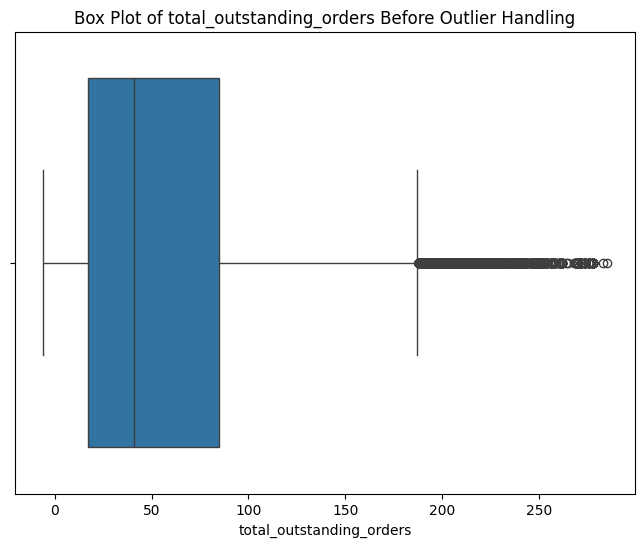

Summary statistics for total_outstanding_orders before outlier handling:
count    140621.000000
mean         58.245148
std          52.773640
min          -6.000000
25%          17.000000
50%          41.000000
75%          85.000000
max         285.000000
Name: total_outstanding_orders, dtype: float64


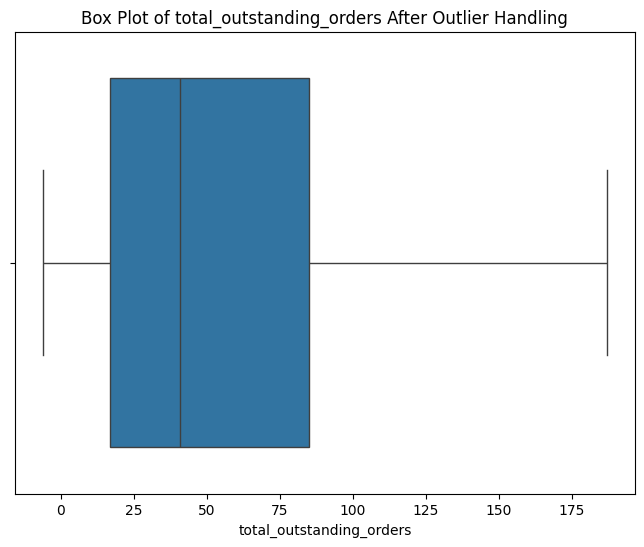

Summary statistics for total_outstanding_orders after outlier handling:
count    140621.000000
mean         57.568998
std          50.812543
min          -6.000000
25%          17.000000
50%          41.000000
75%          85.000000
max         187.000000
Name: total_outstanding_orders, dtype: float64


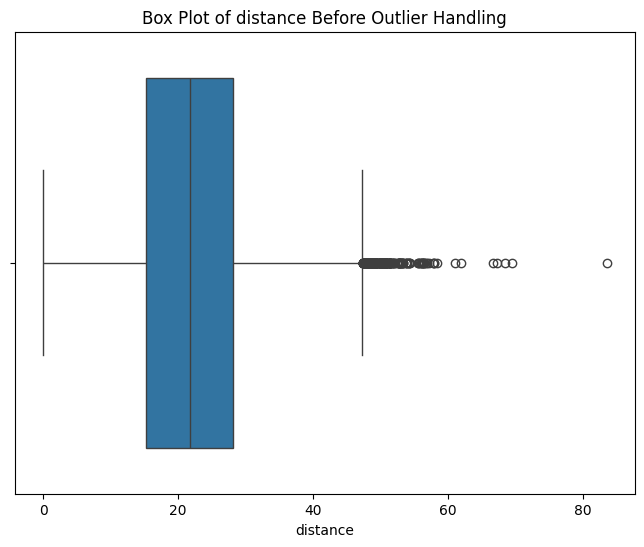

Summary statistics for distance before outlier handling:
count    140621.000000
mean         21.841054
std           8.751147
min           0.000000
25%          15.320000
50%          21.760000
75%          28.120000
max          83.520000
Name: distance, dtype: float64


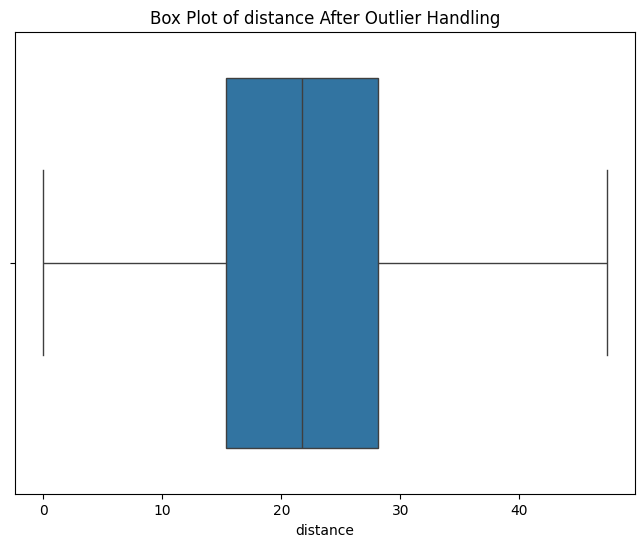

Summary statistics for distance after outlier handling:
count    140621.000000
mean         21.835177
std           8.731199
min           0.000000
25%          15.320000
50%          21.760000
75%          28.120000
max          47.320000
Name: distance, dtype: float64


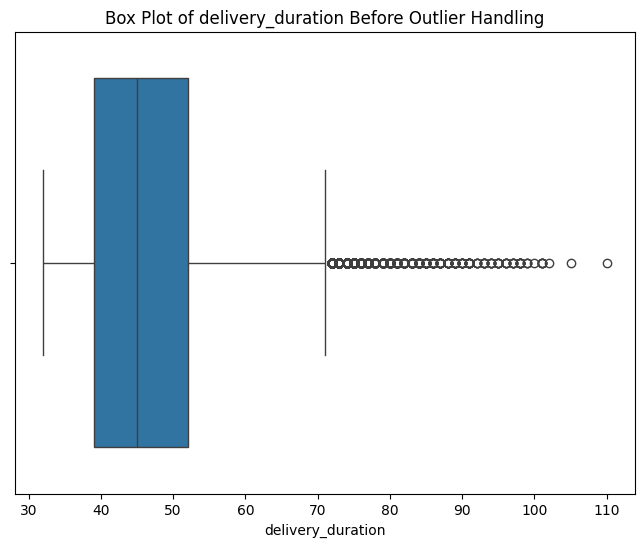

Summary statistics for delivery_duration before outlier handling:
count    140621.000000
mean         46.198071
std           9.320360
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: delivery_duration, dtype: float64


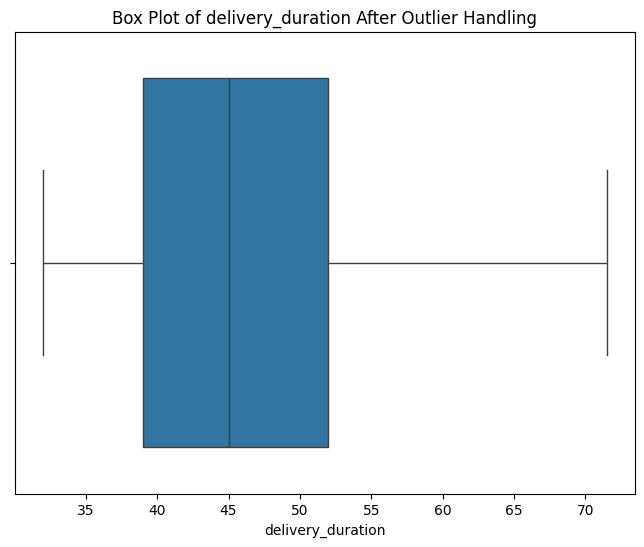

Summary statistics for delivery_duration after outlier handling:
count    140621.000000
mean         46.139819
std           9.123066
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max          71.500000
Name: delivery_duration, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
                      'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
                      'total_outstanding_orders', 'distance', 'delivery_duration']
correlation_matrix = df_train[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


weakly_correlated_features = correlation_matrix[abs(correlation_matrix['delivery_duration']) < 0.1].index.tolist()


if 'delivery_duration' in weakly_correlated_features:
    weakly_correlated_features.remove('delivery_duration')

print(f"Weakly correlated features: {weakly_correlated_features}")



for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_train[col])
    plt.title(f'Box Plot of {col} Before Outlier Handling')
    plt.show()
    print(f"Summary statistics for {col} before outlier handling:\n{df_train[col].describe()}")


    q1 = df_train[col].quantile(0.25)
    q3 = df_train[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df_train[col] = np.clip(df_train[col], lower_bound, upper_bound)

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_train[col])
    plt.title(f'Box Plot of {col} After Outlier Handling')
    plt.show()
    print(f"Summary statistics for {col} after outlier handling:\n{df_train[col].describe()}")

4) Exploratory Data Analysis on Validation Data



4.1 Feature Distribution

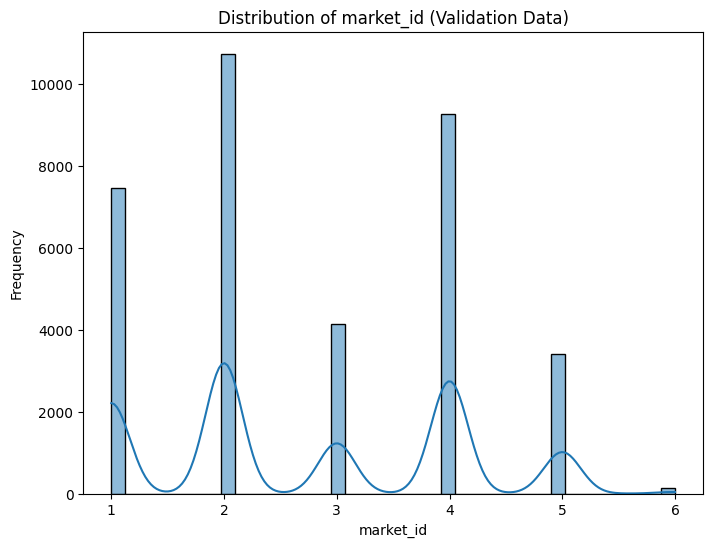

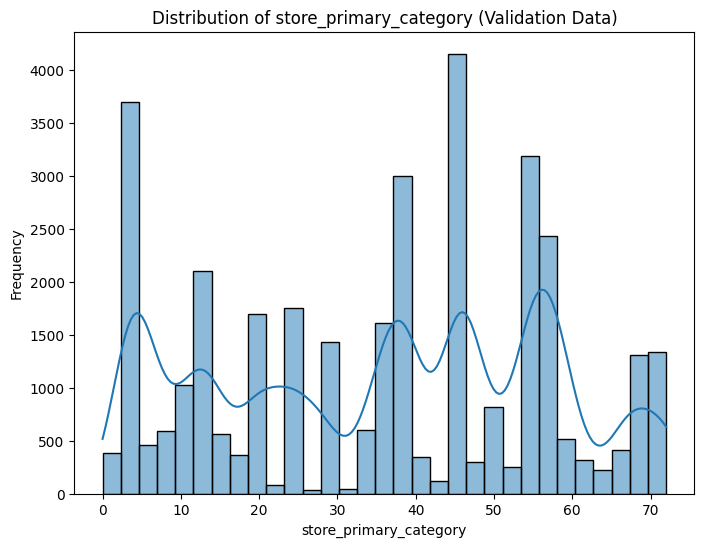

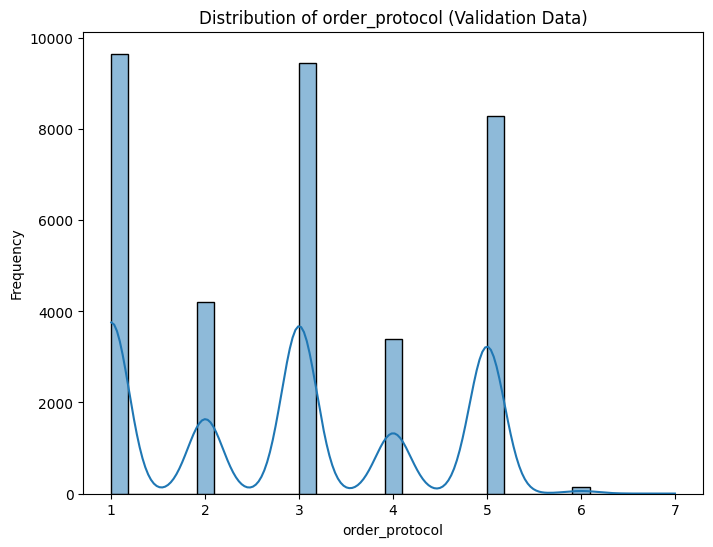

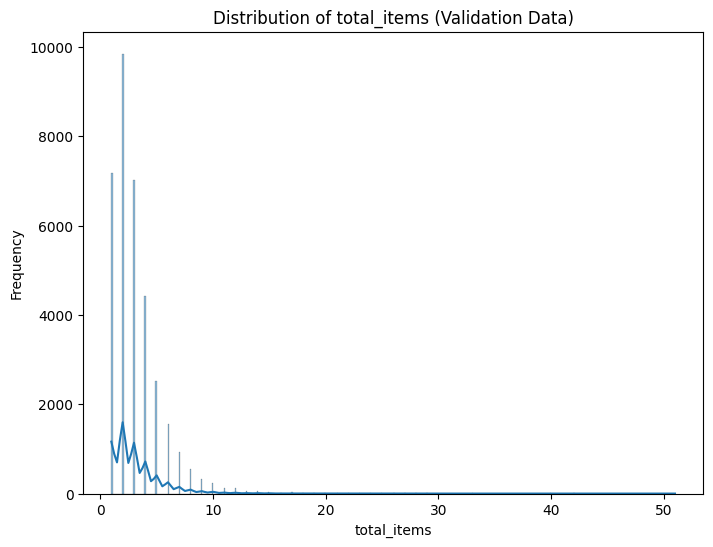

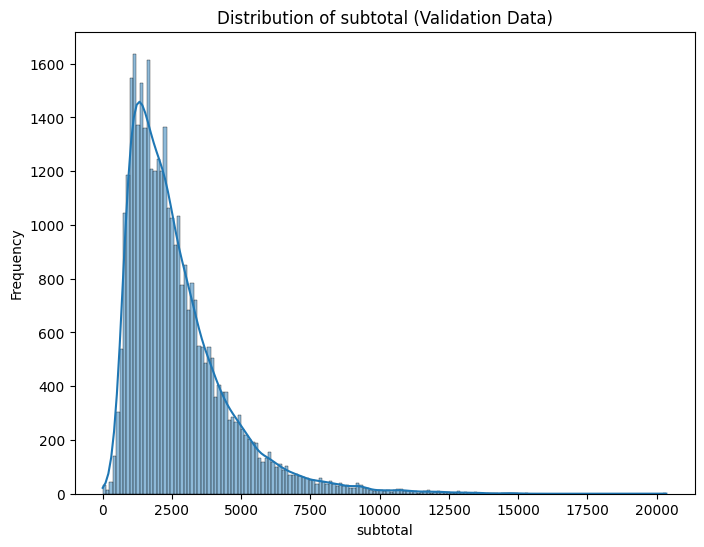

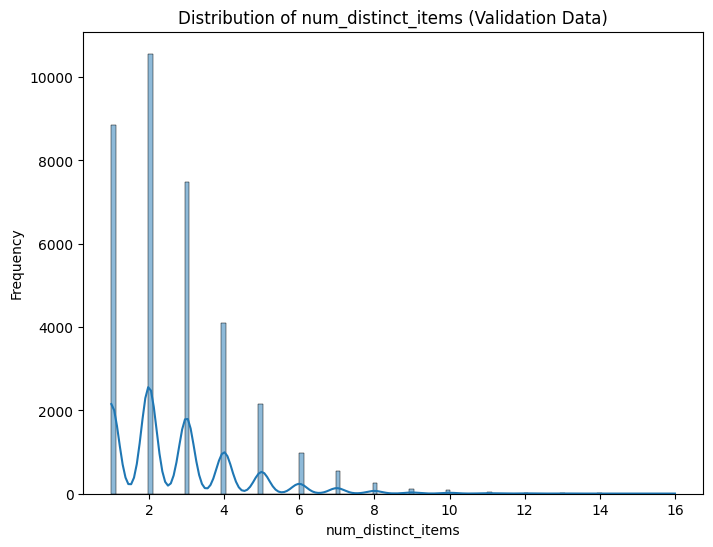

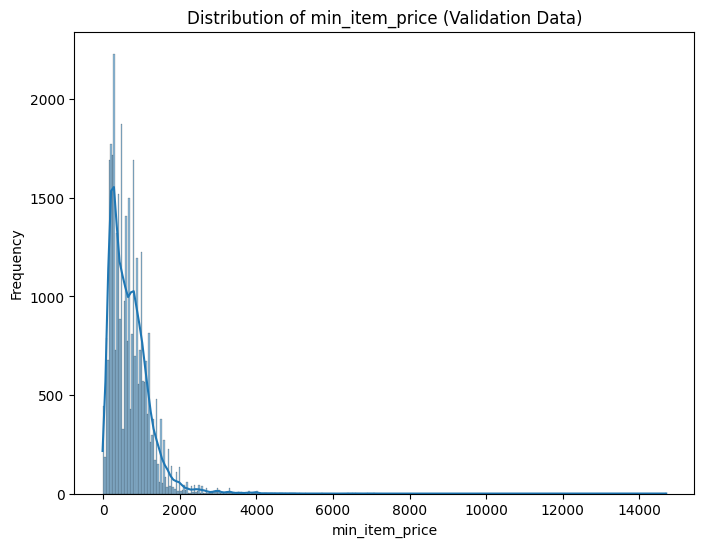

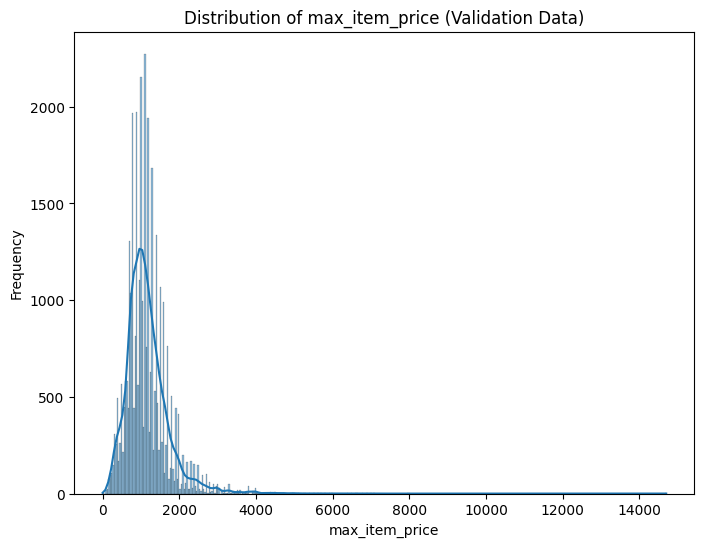

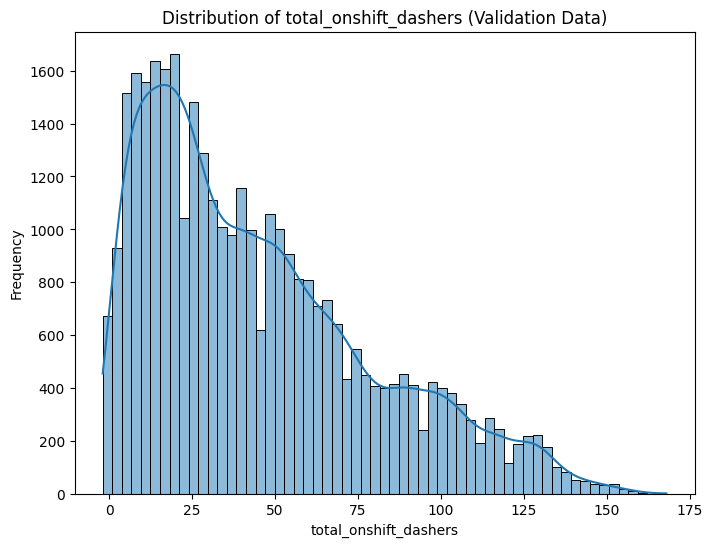

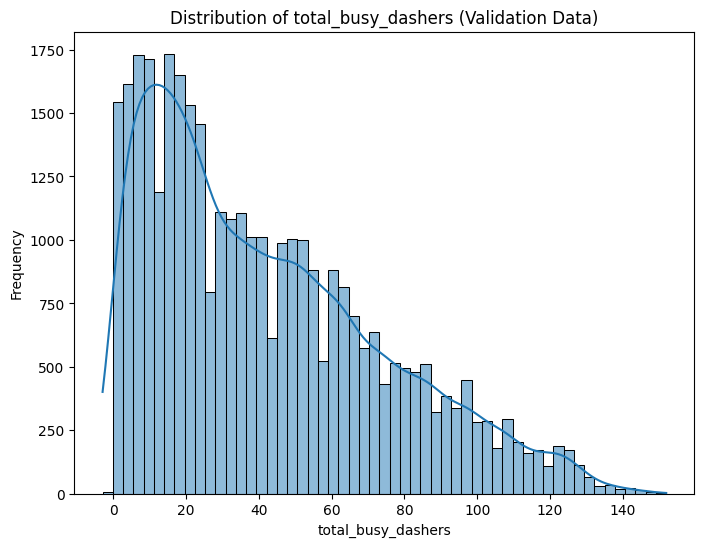

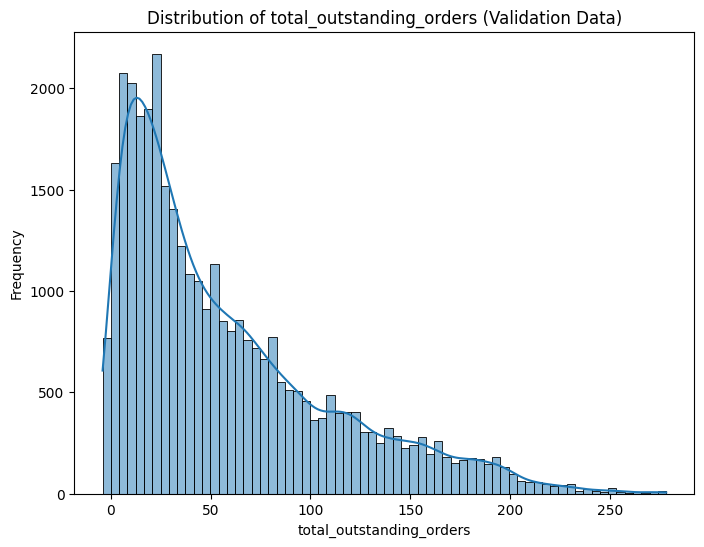

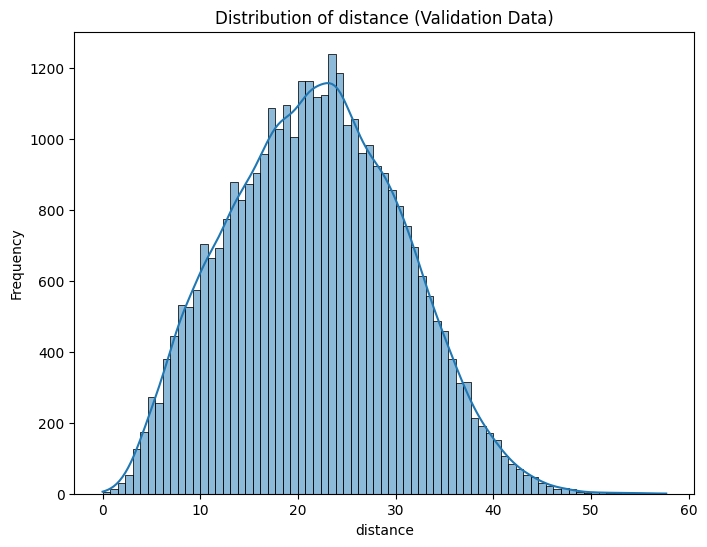

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in df_val.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))
    sns.histplot(df_val[col], kde=True)
    plt.title(f'Distribution of {col} (Validation Data)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


for col in df_val.select_dtypes(include=['object', 'category']):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df_val)
    plt.title(f'Distribution of {col} (Validation Data)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

4.2 Relationships between different features

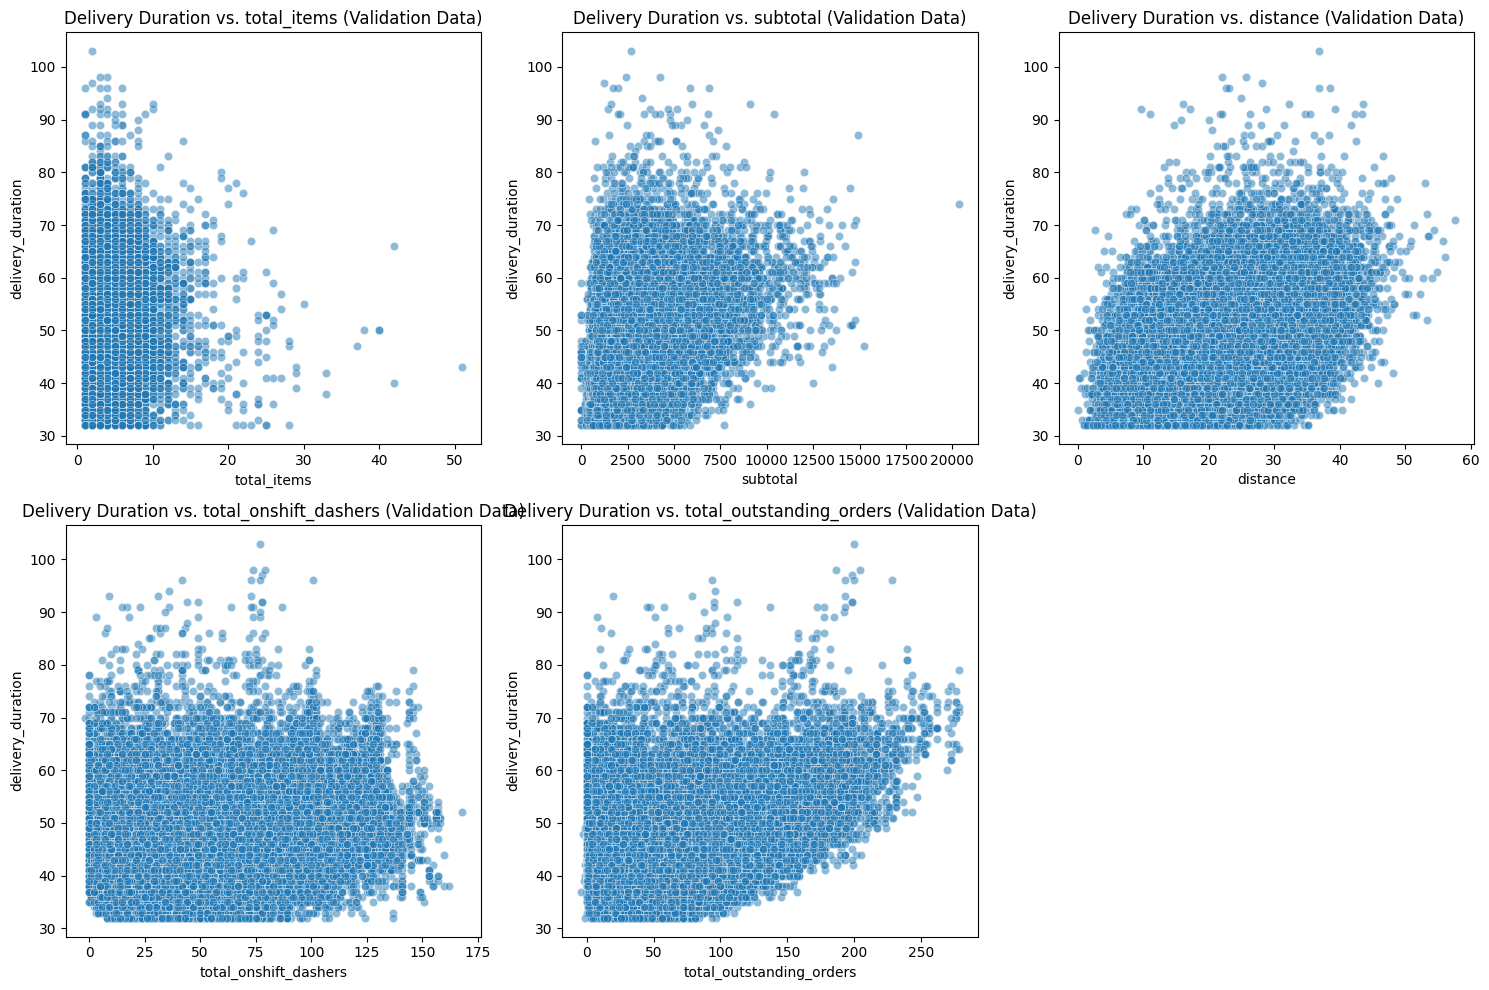

<Figure size 1500x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df_val['delivery_duration'] = (df_val['actual_delivery_time'] - df_val['created_at']).dt.total_seconds() / 60


numerical_features = ['total_items', 'subtotal', 'distance', 'total_onshift_dashers', 'total_outstanding_orders']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=col, y='delivery_duration', data=df_val, alpha=0.5)
    plt.title(f'Delivery Duration vs. {col} (Validation Data)')
plt.tight_layout()
plt.show()


categorical_features_encoded = [col for col in df_val.columns if col.startswith(('market_id_', 'store_primary_category_', 'order_protocol_'))]

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features_encoded):
    plt.subplot(1, len(categorical_features_encoded), i + 1) # Adjust subplot layout
    sns.boxplot(x=col, y='delivery_duration', data=df_val)
    plt.title(f'Delivery Duration vs. {col} (Validation Data)')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4.3 Correlation Analysis

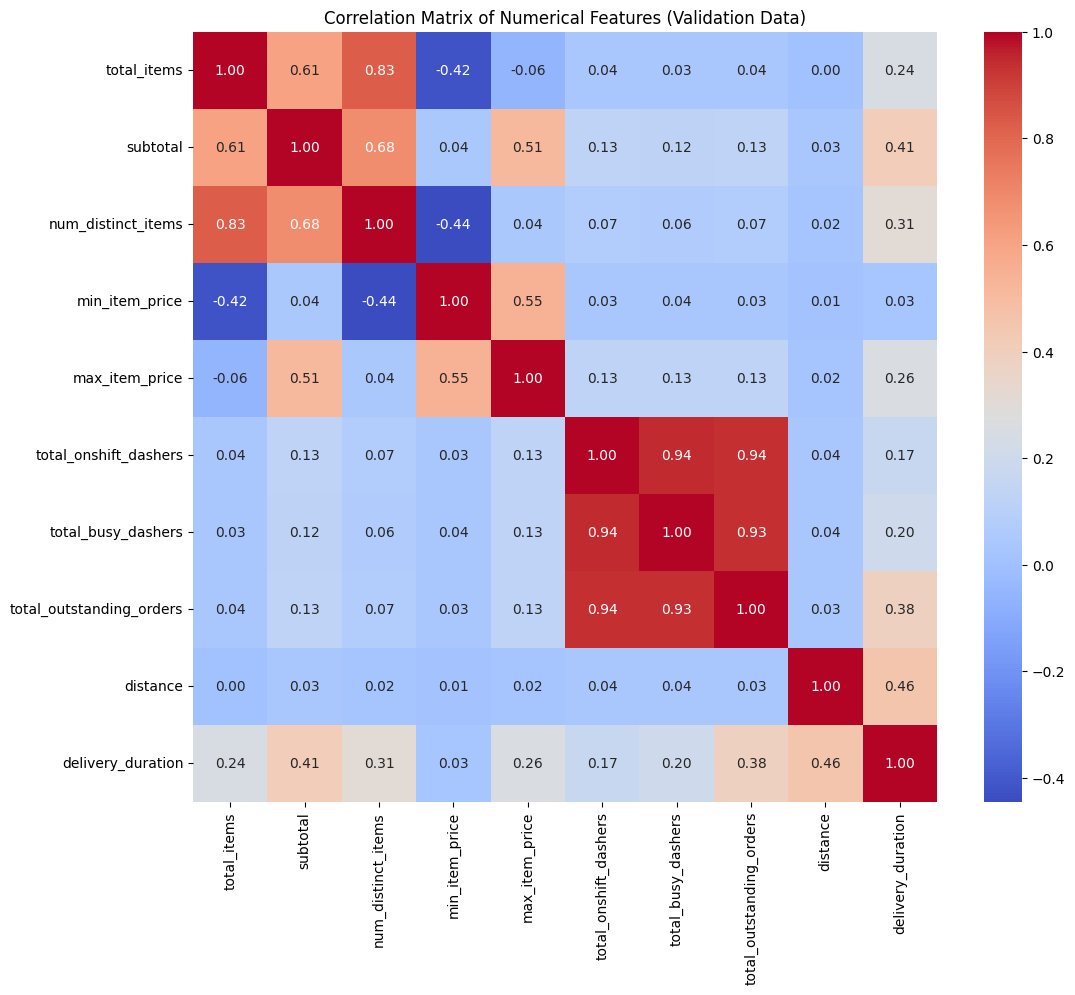

In [ ]:

numerical_features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
                      'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
                      'total_outstanding_orders', 'distance', 'delivery_duration']
correlation_matrix = df_val[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Validation Data)')
plt.show()

5. Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_train = df_train.drop(columns=['delivery_duration', 'created_at', 'actual_delivery_time'])
y_train = df_train['delivery_duration']
X_val = df_val.drop(columns=['delivery_duration', 'created_at', 'actual_delivery_time'])
y_val = df_val['delivery_duration']


common_cols = list(set(X_train.columns) & set(X_val.columns))
X_train = X_train[common_cols]
X_val = X_val[common_cols]


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_val)


mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 15.406812873685025
R-squared: 0.823977025721572


In [ ]:
print(df.columns)

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')
